# **Cars Data  Anlysis**

In [ ]:
#imports the libs we needed and uploade the file
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

Saving cars.csv to cars (1).csv


# **`*Explore the dataset*`**

In [ ]:
# read the file we working on it
car_data = pd.read_csv("cars.csv")
car_data.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223.0,Diesel,145,39.8,2.2,31995
1,17314,vauxhall,GTC,2015,Manual,47870.0,Diesel,125,60.1,2.0,7700
2,12342,audi,RS4,2019,Automatic,5151.0,Petrol,145,29.1,2.9,58990
3,13426,vw,Scirocco,2016,Automatic,20423.0,Diesel,30,57.6,2.0,12999
4,16004,skoda,Scala,2020,Semi-Auto,3569.0,Petrol,145,47.1,1.0,16990


In [ ]:
#explore the Data Type of column
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carID         4960 non-null   int64  
 1   brand         4942 non-null   object 
 2   model         4960 non-null   object 
 3   year          4960 non-null   int64  
 4   transmission  4960 non-null   object 
 5   mileage       4954 non-null   float64
 6   fuelType      4943 non-null   object 
 7   tax           4960 non-null   int64  
 8   mpg           4948 non-null   float64
 9   engineSize    4952 non-null   float64
 10  price         4960 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 426.4+ KB


In [ ]:
#expolore the numaric data
car_data.describe()

,carID,year,mileage,tax,mpg,engineSize,price
count,4960.000000,4960.000000,4954.000000,4960.000000,4948.000000,4952.000000,4960.000000
mean,15832.446169,2016.737903,24949.957812,152.332661,50.390158,2.123425,23469.943750
std,2206.717006,2.884035,24451.380600,82.403844,35.781756,0.786778,16406.714563
min,12002.000000,1997.000000,1.000000,0.000000,2.800000,0.000000,450.000000
25%,13929.250000,2016.000000,5622.500000,145.000000,38.700000,1.600000,12000.000000
50%,15840.000000,2017.000000,18971.500000,145.000000,47.100000,2.000000,18999.000000
75%,17765.750000,2019.000000,36692.750000,150.000000,54.300000,2.800000,30335.750000
max,19629.000000,2020.000000,259000.000000,580.000000,470.800000,6.600000,145000.000000


In [ ]:
#expolare the string data
car_data.describe(include='O')

,brand,model,transmission,fuelType
count,4942,4960,4960,4943
unique,9,90,4,5
top,merc,Arteon,Manual,Diesel
freq,789,167,1948,2981


In [ ]:
#check the nulls
car_data.isnull().sum()

,0
carID,0
brand,18
model,0
year,0
transmission,0
mileage,6
fuelType,17
tax,0
mpg,12
engineSize,8


In [ ]:
#check the duplicated value
car_data.duplicated().sum()

0

In [ ]:
#explore the classification column
car_data['transmission'].unique()

array(['Semi-Auto', 'Manual', 'Automatic', 'Other'], dtype=object)

In [ ]:
#explore the classification column
car_data['fuelType'].unique()


array(['Diesel', 'Petrol', 'Hybrid', 'Other', 'Electric', nan],
      dtype=object)

# ***Clean the dataset***

In [ ]:
# drop the rows that contain nulls value because the total of them are not big
car_data.dropna(subset=['brand','mileage','fuelType','mpg','engineSize'], inplace=True)

In [ ]:
car_data.isnull().sum()

,0
carID,0
brand,0
model,0
year,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [ ]:
#change the other value to common (mod) value in column(transmission,fuelType) or we foundit in the up steps in describe functions
transmission_mode = car_data['transmission'].mode()[0]
car_data['transmission'] = car_data['transmission'].replace('Other','Manual')
car_data['transmission'].unique()

array(['Semi-Auto', 'Manual', 'Automatic'], dtype=object)

In [ ]:
fuelType_mode = car_data['fuelType'].mode()[0]
car_data['fuelType'] = car_data['fuelType'].replace('Other','Diesel')
car_data['fuelType'].unique()

array(['Diesel', 'Petrol', 'Hybrid', 'Electric'], dtype=object)

no needed to change the datatype of year to date because is not contain monthes and days we can take as number and tax column not contain float values so we not change it





# ***Feature Engineering***

In [ ]:
car_data.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223.0,Diesel,145,39.8,2.2,31995
1,17314,vauxhall,GTC,2015,Manual,47870.0,Diesel,125,60.1,2.0,7700
2,12342,audi,RS4,2019,Automatic,5151.0,Petrol,145,29.1,2.9,58990
3,13426,vw,Scirocco,2016,Automatic,20423.0,Diesel,30,57.6,2.0,12999
4,16004,skoda,Scala,2020,Semi-Auto,3569.0,Petrol,145,47.1,1.0,16990


In [ ]:
#now start to drop not important column
car_data.drop('carID',axis = 1,inplace = True)

In [ ]:
#I will merge the model,brand and year to geather and named Car Model
car_data['Car Model'] = car_data['brand'] + ' ' + car_data['model'] + ' ' + car_data['year'].astype(str)


In [ ]:
car_data.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price,Car Model
0,hyundi,Santa Fe,2019,Semi-Auto,4223.0,Diesel,145,39.8,2.2,31995,hyundi Santa Fe 2019
1,vauxhall,GTC,2015,Manual,47870.0,Diesel,125,60.1,2.0,7700,vauxhall GTC 2015
2,audi,RS4,2019,Automatic,5151.0,Petrol,145,29.1,2.9,58990,audi RS4 2019
3,vw,Scirocco,2016,Automatic,20423.0,Diesel,30,57.6,2.0,12999,vw Scirocco 2016
4,skoda,Scala,2020,Semi-Auto,3569.0,Petrol,145,47.1,1.0,16990,skoda Scala 2020


In [ ]:
#Now I will drope the
car_data.drop(['brand','model','year'],axis = 1,inplace = True)

# ***visualization figures***

In [ ]:
top_30_models = car_data['Car Model'].value_counts().nlargest(30).index
filtered_df = car_data[car_data['Car Model'].isin(top_30_models)]
filtered_df

,transmission,mileage,fuelType,tax,mpg,engineSize,price,Car Model
0,Semi-Auto,4223.0,Diesel,145,39.8,2.2,31995,hyundi Santa Fe 2019
3,Automatic,20423.0,Diesel,30,57.6,2.0,12999,vw Scirocco 2016
4,Semi-Auto,3569.0,Petrol,145,47.1,1.0,16990,skoda Scala 2020
5,Automatic,4170.0,Diesel,145,44.1,2.1,40890,merc V Class 2019
7,Semi-Auto,101.0,Petrol,145,34.0,3.0,41980,bmw M4 2019
...,...,...,...,...,...,...,...,...
4938,Manual,28310.0,Diesel,125,56.5,2.0,17990,ford Galaxy 2017
4945,Semi-Auto,8121.0,Diesel,145,54.3,1.6,17495,skoda Scala 2019
4950,Semi-Auto,2687.0,Petrol,145,44.1,1.5,18995,skoda Kamiq 2019
4951,Semi-Auto,30.0,Diesel,145,40.9,2.2,32995,hyundi Santa Fe 2019


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

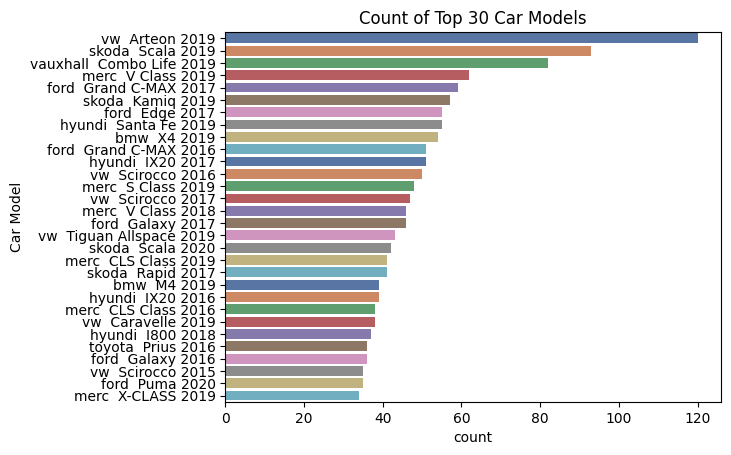

In [ ]:
# Visualization - Countplot for Top 30 Car Models
sns.countplot(data=filtered_df, y='Car Model', order=top_30_models, palette='deep')
plt.title('Count of Top 30 Car Models')
plt

Text(0.5, 1.0, 'Number of cars for each transmission')

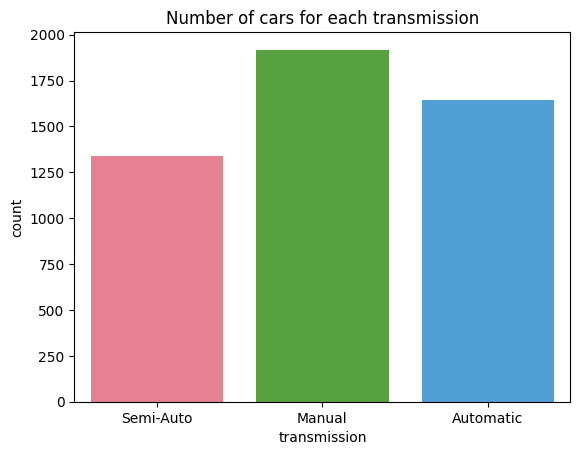

In [ ]:
sns.countplot(data = car_data,x = 'transmission',palette='husl')
plt.title('Number of cars for each transmission')

Text(0.5, 1.0, 'Number of cars for each fuelType')

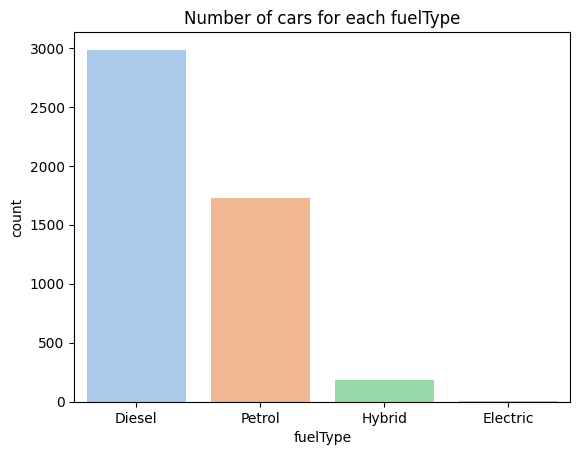

In [ ]:
sns.countplot(data = car_data,x = 'fuelType',palette='pastel')
plt.title('Number of cars for each fuelType')

In [ ]:
car_data['fuelType'].value_counts()

,count
fuelType,
Diesel,2984
Petrol,1730
Hybrid,184
Electric,2


Text(0.5, 1.0, 'Price by expensive 10 Car Models')

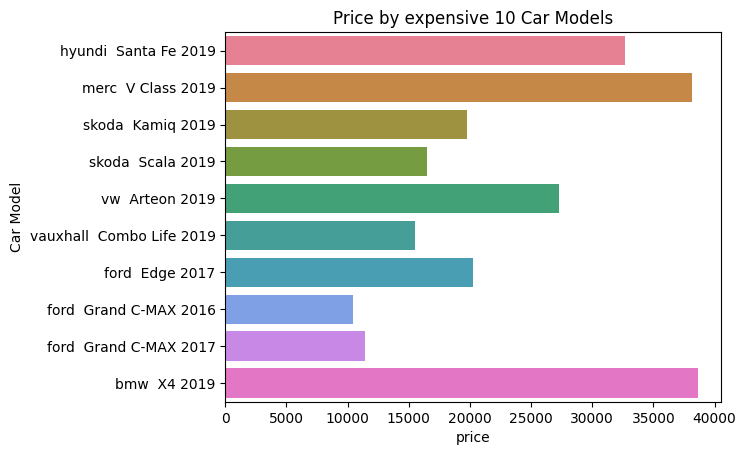

In [ ]:
# Count the frequency of each Car Model and select expensive 10
top_10_models = car_data['Car Model'].value_counts().nlargest(10).index
filtered_df = car_data[car_data['Car Model'].isin(top_10_models)]
palette = sns.color_palette("husl", 10)

# Visualization
sns.barplot(data=filtered_df, x='price', y='Car Model',hue='Car Model', palette=palette, ci=None)
plt.title('Price by expensive 10 Car Models')

Text(0.5, 1.0, 'Price by cheapest 10 Car Models')

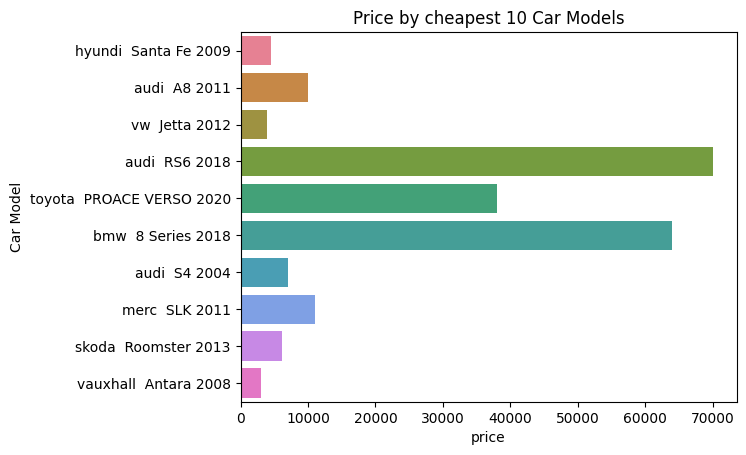

In [ ]:
# Count the frequency of each Car Model and select cheapest 10
last_10_models = car_data['Car Model'].value_counts().nsmallest(10).index
filtered_df = car_data[car_data['Car Model'].isin(last_10_models)]
palette = sns.color_palette("husl", 10)

# Visualization
sns.barplot(data=filtered_df, x='price', y='Car Model',hue='Car Model', palette=palette)
plt.title('Price by cheapest 10 Car Models')


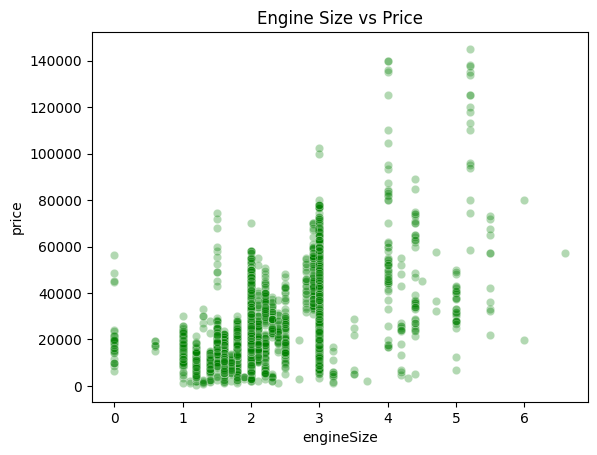

In [ ]:
sns.scatterplot(data=car_data, x='engineSize', y='price', color='green', alpha=0.3)
plt.title('Engine Size vs Price')
plt.show()

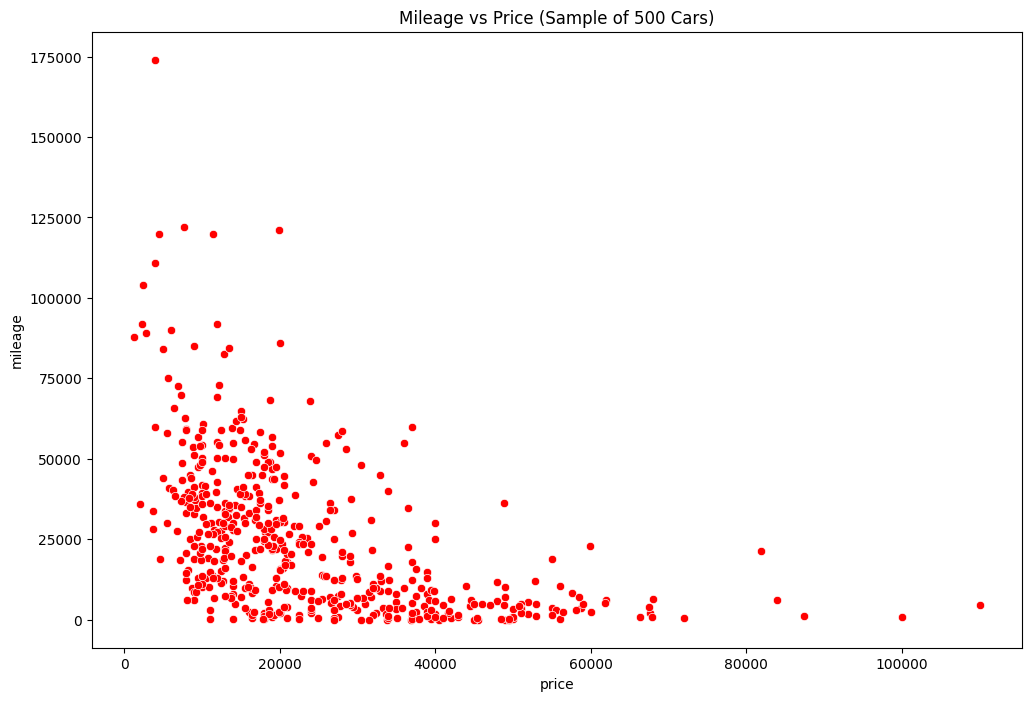

In [ ]:

sampled_df = car_data.sample(n=500, random_state=42)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=sampled_df, y='mileage', x='price',color='red')
plt.title('Mileage vs Price (Sample of 500 Cars)')
plt.show()

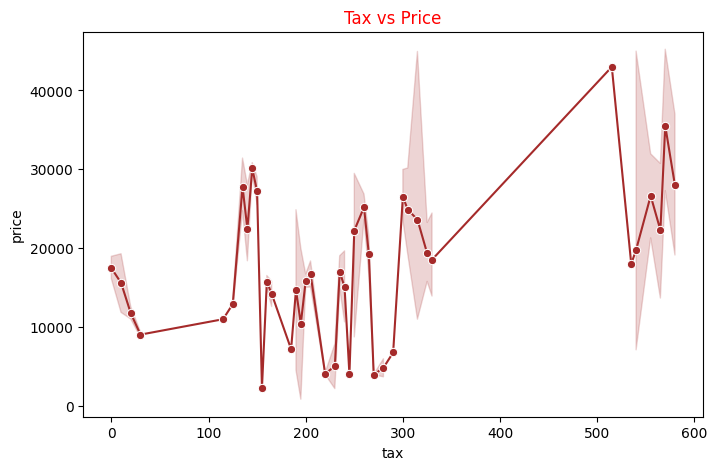

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=car_data, x='tax', y='price', color='brown',marker='o')
plt.title('Tax vs Price',color='brown')
plt.show()

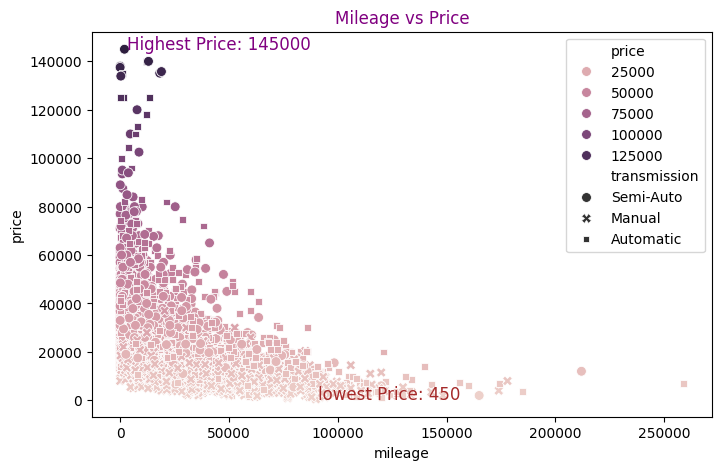

In [ ]:
#scatter plot visualizing the relationship between a car's mileage and its price
sampled_car_data = car_data.sample(n=50, random_state=42)
plt.figure(figsize=(8, 5))
highest_price = car_data['price'].max()
highest_price_car = car_data[car_data['price'] == highest_price]
lowest_price = car_data['price'].min()
lowest_price_car = car_data[car_data['price'] == lowest_price]
plt.text(highest_price_car['mileage'].values[0] + 1000, highest_price_car['price'].values[0],
         f"Highest Price: {int(highest_price)}", color='Purple', fontsize=12)
plt.text(lowest_price_car['mileage'].values[0] + 1000, lowest_price_car['price'].values[0],
         f"lowest Price: {int(lowest_price)}", color='brown', fontsize=12)
sns.scatterplot(data=car_data, x='mileage', y='price', hue='price', style='transmission', s=50)
plt.title('Mileage vs Price',color='Purple')

plt.show()

In [ ]:
trans_price = car_data.groupby('transmission')['price'].mean().reset_index()
trans_price

,transmission,price
0,Automatic,27417.922141
1,Manual,13227.478102
2,Semi-Auto,33395.991779


Text(0.5, 1.0, 'Transmission vs Price')

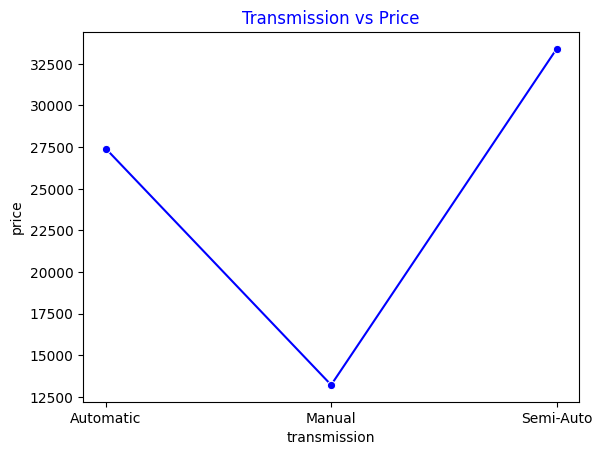

In [ ]:
sns.lineplot(data = trans_price,x = 'transmission' ,y= 'price',marker = 'o' ,color= 'blue')
plt.title('Transmission vs Price',color='blue')

In [ ]:
fuel_price = car_data.groupby('fuelType')['price'].mean().reset_index()
fuel_price

,fuelType,price
0,Diesel,24206.849196
1,Electric,18199.500000
2,Hybrid,22090.043478
3,Petrol,22424.854913


Text(0.5, 1.0, 'fuelType vs Price')

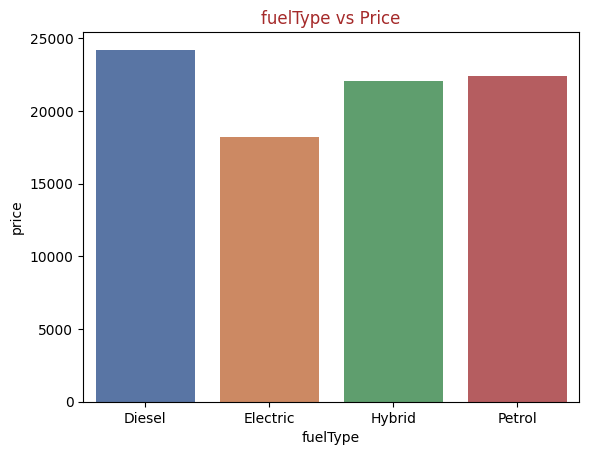

In [ ]:
#sns.lineplot(data = fuel_price,x = 'fuelType' ,y= 'price',marker = 'o' ,palette= 'Any')
sns.barplot(data = fuel_price,x = 'fuelType', y= 'price',palette= 'deep')
plt.title('fuelType vs Price',color='brown')

In [ ]:
mil_price = car_data.groupby('mileage')['price'].mean().reset_index()
mil_price

,mileage,price
0,1.0,22571.000
1,3.0,42494.500
2,4.0,13495.000
3,5.0,34621.625
4,6.0,39110.000
...,...,...
3852,174419.0,6950.000
3853,178000.0,7994.000
3854,185000.0,3495.000
3855,212000.0,11995.000


# **Build Model**

# ***Data Encoding***

In [ ]:
# we started to change all string column to numaric
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
car_data['Car Model'] = encoder.fit_transform(car_data['Car Model'])
car_data['Car Model'].value_counts()

,count
Car Model,
500,120
378,93
473,82
359,62
196,59
...,...
103,1
134,1
401,1


In [ ]:
car_data['transmission'] = encoder.fit_transform(car_data['transmission'])
car_data['fuelType'] = encoder.fit_transform(car_data['fuelType'])


In [ ]:
car_data.head(10)

,transmission,mileage,fuelType,tax,mpg,engineSize,price,Car Model
0,2,4223.0,0,145,39.8,2.2,31995,271
1,1,47870.0,0,125,60.1,2.0,7700,476
2,0,5151.0,3,145,29.1,2.9,58990,42
3,0,20423.0,0,30,57.6,2.0,12999,566
4,2,3569.0,3,145,47.1,1.0,16990,379
5,0,4170.0,0,145,44.1,2.1,40890,359
6,0,3.0,2,135,64.2,1.8,25990,446
7,2,101.0,3,145,34.0,3.0,41980,114
8,0,6340.0,2,135,52.3,2.5,25490,400
9,1,85843.0,3,30,57.7,1.2,3491,209


# *** Scalling***

In [ ]:
# make all the column in the same range
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
car_data['mileage'] = scaler.fit_transform(car_data[['mileage']])
car_data.head(10)

,transmission,mileage,fuelType,tax,mpg,engineSize,price,Car Model
0,2,-0.844670,0,145,39.8,2.2,31995,271
1,1,0.937736,0,125,60.1,2.0,7700,476
2,0,-0.806773,3,145,29.1,2.9,58990,42
3,0,-0.183113,0,30,57.6,2.0,12999,566
4,2,-0.871377,3,145,47.1,1.0,16990,379
5,0,-0.846834,0,145,44.1,2.1,40890,359
6,0,-1.017001,2,135,64.2,1.8,25990,446
7,2,-1.012999,3,145,34.0,3.0,41980,114
8,0,-0.758218,2,135,52.3,2.5,25490,400
9,1,2.488433,3,30,57.7,1.2,3491,209


In [ ]:
# repait the up steps in other column
car_data['tax'] = scaler.fit_transform(car_data[['tax']])
car_data['mpg'] = scaler.fit_transform(car_data[['mpg']])
car_data['price'] = scaler.fit_transform(car_data[['price']])
car_data['Car Model'] = scaler.fit_transform(car_data[['Car Model']])
car_data.head(10)

,transmission,mileage,fuelType,tax,mpg,engineSize,price,Car Model
0,2,-0.844670,0,-0.086172,-0.297316,2.2,0.518327,-0.219234
1,1,0.937736,0,-0.330524,0.277216,2.0,-0.963304,1.112556
2,0,-0.806773,3,-0.086172,-0.600148,2.9,2.164617,-1.706941
3,0,-0.183113,0,-1.491198,0.206461,2.0,-0.640145,1.697244
4,2,-0.871377,3,-0.086172,-0.090711,1.0,-0.396754,0.482392
5,0,-0.846834,0,-0.086172,-0.175617,2.1,1.060788,0.352461
6,0,-1.017001,2,-0.208348,0.393254,1.8,0.152112,0.917660
7,2,-1.012999,3,-0.086172,-0.461468,3.0,1.127262,-1.239190
8,0,-0.758218,2,-0.208348,0.056460,2.5,0.121619,0.618819
9,1,2.488433,3,-1.491198,0.209291,1.2,-1.219990,-0.622020


# ***feature selection***

In [ ]:
# fixed the X and y
x= car_data[['transmission','mileage','fuelType','tax','mpg','engineSize','Car Model']]
y= car_data['price']

In [ ]:
x

,transmission,mileage,fuelType,tax,mpg,engineSize,Car Model
0,2,-0.844670,0,-0.086172,-0.297316,2.2,-0.219234
1,1,0.937736,0,-0.330524,0.277216,2.0,1.112556
2,0,-0.806773,3,-0.086172,-0.600148,2.9,-1.706941
3,0,-0.183113,0,-1.491198,0.206461,2.0,1.697244
4,2,-0.871377,3,-0.086172,-0.090711,1.0,0.482392
...,...,...,...,...,...,...,...
4954,0,-0.723343,2,-0.208348,0.393254,1.8,0.911163
4955,0,-0.024217,0,-0.330524,0.178158,2.1,-0.017842
4956,0,-0.282061,0,-0.086172,0.030988,3.0,-1.460073
4957,1,2.451231,0,-1.491198,0.277216,2.0,1.385410


In [ ]:
y

,price
0,0.518327
1,-0.963304
2,2.164617
3,-0.640145
4,-0.396754
...,...
4954,-0.000351
4955,-0.335220
4956,0.329578
4957,-0.884146


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
selector = SelectKBest(score_func = f_regression, k = 5)
x_new = selector.fit_transform(x,y)

In [ ]:
#split the xtrain and ytrain, xtest ,ytest
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# *Regression Model*

In [ ]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# calculate the xtest predict
pred = model.predict(X_test)

In [ ]:
#caucalute the error ytest predict by mean absolute error(
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(pred,y_test)
MAE

0.4206612961930928

In [ ]:
# calculate the ytest predict by R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test,pred)
r2

0.6093284113555781